In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base=automap_base()

# reflect the tables

Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

Measurement=Base.classes.measurement

Stations=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB

session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

from datetime import date, timedelta
most_recent_date=dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d').date()

DateYaerAgo=most_recent_date-timedelta(days=365)

DateYaerAgo

datetime.date(2016, 8, 23)

In [11]:

# Perform a query to retrieve the data and precipitation scores

Post12M_precipitation=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date>=DateYaerAgo).all()




# Save the query results as a Pandas DataFrame and set the index to the date column

Result=pd.DataFrame(Post12M_precipitation,columns=['Date','PRCP'])

Result.set_index('Date',inplace=True)

# Sort the dataframe by date

SortResult=Result.sort_values('Date',ascending=True)
SortResult


,PRCP
Date,
2016-08-23,0.0
2016-08-23,NaN
2016-08-23,45.5
2016-08-23,1.3
2016-08-23,3.8
...,...
2017-08-22,0.0
2017-08-23,0.0
2017-08-23,0.0


/Users/huan-jhelin/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


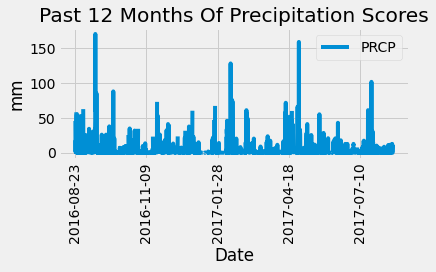

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data

SortResult.plot()
plt.xticks(rotation=90)
plt.title('Past 12 Months Of Precipitation Scores')
plt.xlabel('Date')
plt.ylabel('mm')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Outputdata/precipitation.png')
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data

SortResult.describe()

,PRCP
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset

StationCounts=session.query(Stations).count()

StationCounts

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

counts=func.count(Measurement.station)

Mostactivity=session.query(Measurement.station,counts).group_by(Measurement.station).order_by(counts.desc()).first()

# List the stations and the counts in descending order.

activity=session.query(Measurement.station,counts).group_by(Measurement.station).order_by(counts.desc()).all()

activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

LowTemp=session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()

MaxTemp=session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()

AveTemp=session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()

#extract data from lists

LowTemp=LowTemp[0][0]

MaxTemp=MaxTemp[0][0]

AveTemp=AveTemp[0][0]

print(f'Station:USC00519281')
print(f'Maximum Temperature is {round(LowTemp,2)} degrees celsius')
print(f'Minimum Temperature is {round(MaxTemp,2)} degrees celsius')
print(f'Average Temperature is {round(AveTemp,2)} degrees celsius')

Station:USC00519281
Maximum Temperature is 12.2 degrees celsius
Minimum Temperature is 29.4 degrees celsius
Average Temperature is 22.04 degrees celsius


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station

Post12M_USC00519281=session.query(Measurement.tobs).\
    filter(Measurement.date>=DateYaerAgo).filter(Measurement.station=='USC00519281')

Result=pd.DataFrame(Post12M_USC00519281,columns=['TOBS'])

Result

,TOBS
0,25.0
1,25.0
2,26.7
3,26.7
4,23.9
...,...
347,25.0
348,25.0
349,24.4
350,24.4


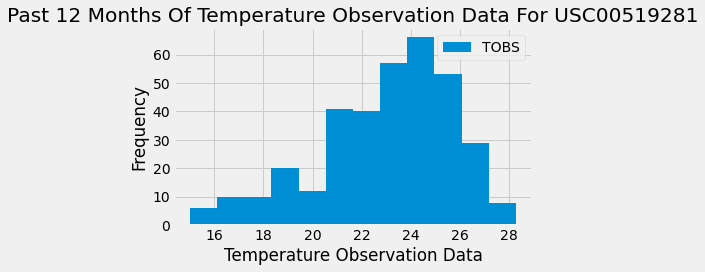

In [18]:

# plot the results as a histogram(bins)

plt.hist(Result['TOBS'],bins=12)
plt.title('Past 12 Months Of Temperature Observation Data For USC00519281')
plt.xlabel('Temperature Observation Data')
plt.ylabel('Frequency')
plt.legend(['TOBS'])
plt.tight_layout()
plt.savefig('Outputdata/station-histogram.png')
plt.show()

# Close session

In [19]:
# Close Session

session.close()